# Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import numpy as np

import seaborn as sns

# Reading Data Set using Pandas

In [2]:
data = pd.read_csv('Demographic_Data.csv')

# Preliminary Analysis and Data Cleaning

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919701,2.675000
std,0.500003,15.715679,2.061238,721.273702,1.126672
min,0.000000,18.000000,1.000000,5.000000,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data = data.drop_duplicates()
data.describe()

,in-store,age,items,amount,region
count,79976.000000,79976.000000,79976.000000,79976.000000,79976.000000
mean,0.500025,45.757990,4.505089,835.854327,2.674940
std,0.500003,15.714653,2.061268,721.262053,1.126655
min,0.000000,18.000000,1.000000,5.000000,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,1.000000,45.000000,4.000000,582.240000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [8]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [9]:
data.shape

(79976, 5)

In [10]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


### Testing Some Visualization Models for Potential Analysis

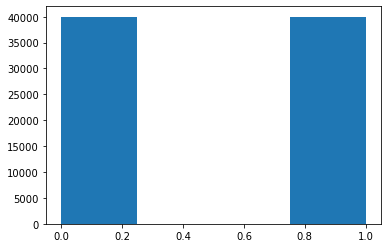

In [11]:
plt.hist(data['in-store'], bins=4)
plt.show()

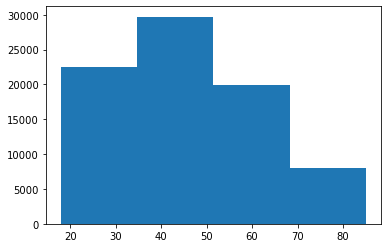

In [12]:
plt.hist(data['age'], bins=4)
plt.show()

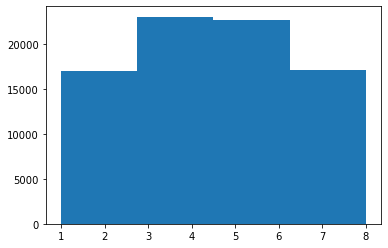

In [13]:
plt.hist(data['items'], bins=4)
plt.show()

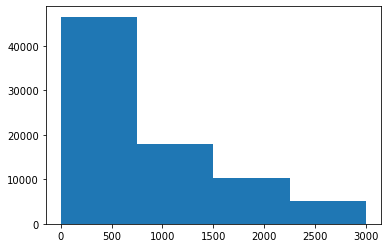

In [14]:
plt.hist(data['amount'], bins=4)
plt.show()

The majority of transactions are under $750.

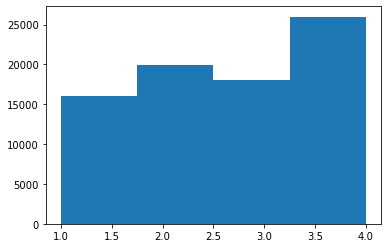

In [15]:
plt.hist(data['region'], bins=4)
plt.show()

Region 4 (West) is the most active sales region.

In [16]:
# Data for plotting test; unrelated to project data
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

<function matplotlib.pyplot.show(close=None, block=None)>

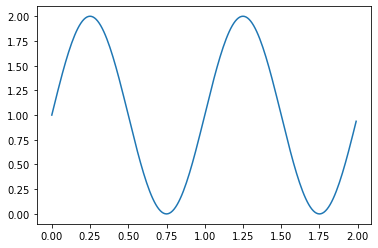

In [17]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show

In [18]:
data_sample = data.sample(100)

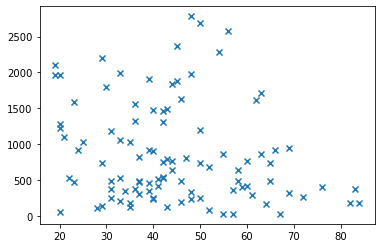

In [19]:
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'x')
plt.show()

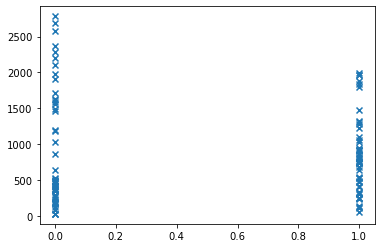

In [20]:
x = data_sample['in-store']
y = data_sample['amount']
plt.scatter(x,y, marker = 'x')
plt.show()

This would suggest a correlation between `amount` spent and whether or not the purchase was made `in-store`. It would appear that customers were more likely to spend more money when purchasing online.

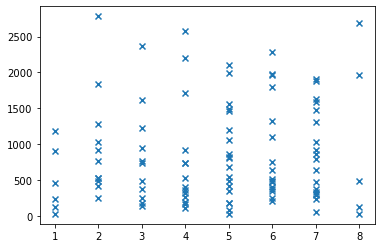

In [21]:
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker = 'x')
plt.show()

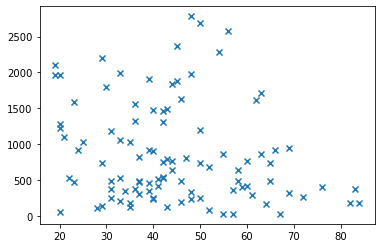

In [22]:
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker = 'x')
plt.show()

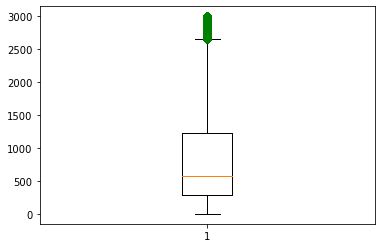

In [23]:
A = data['amount']
plt.boxplot(A,0, 'gD')
plt.show()

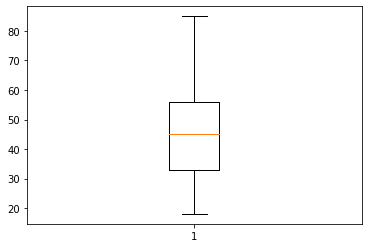

In [24]:
a = data['age']
plt.boxplot(a,0, 'rD')
plt.show()

In [25]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178159 -0.003876 -0.085616 -0.133197
age      -0.178159  1.000000  0.000624 -0.282017 -0.235363
items    -0.003876  0.000624  1.000000  0.000406 -0.001891
amount   -0.085616 -0.282017  0.000406  1.000000  0.403473
region   -0.133197 -0.235363 -0.001891  0.403473  1.000000


The matrix seems to indicate that there is a slight negative correlation between `age` and `amount`. The older a customer
is, the less they are likely to spend on products from this vendor. However, it is not a strong correlation.

In [26]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.399863 -0.003995     -30.875873   -0.075034
age       -1.399863   246.950333  0.020206   -3196.493118   -4.167109
items     -0.003995     0.020206  4.248827       0.604179   -0.004391
amount   -30.875873 -3196.493118  0.604179  520218.949217  327.867869
region    -0.075034    -4.167109 -0.004391     327.867869    1.269352


The matrix indicates a positive covariance between `region` and `amount`, which would imply higher sales in regions `3`
and `4` than in `1` and `2`.

## Breaking Down the Data by Region

In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
cols = ['in-store', 'age', 'items', 'amount']
north = data[data.region == 1]
north = north[cols]
north.index.name = "index_data"
north.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,33,4,"1,937.50"
1,1,51,5,908.31
2,1,47,3,767.54
3,1,33,2,684.32
4,1,20,7,"1,901.30"


In [29]:
south = data[data.region == 2]
south = south[cols]
south.index.name = "index_data"
south.reset_index(drop = True).head()

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,0,43,6,8.55
3,0,32,2,59.00
4,0,42,5,114.49


In [30]:
east = data[data.region == 3]
east = east[cols]
east.index.name = "index_data"
east.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,46,3,715.25
1,1,66,5,819.98
2,1,44,5,122.39
3,1,48,7,529.57
4,0,43,7,"1,585.10"


In [31]:
west = data[data.region == 4]
west = west[cols]
west.index.name = "index_data"
west.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,45,3,"1,525.70"
1,0,24,3,"1,314.20"
2,1,34,6,270.49
3,0,35,2,"2,791.60"
4,0,58,7,"1,225.80"


In [32]:
print("Shape of north{}".format(north.shape))
print("Shape of south{}".format(south.shape))
print("Shape of east{}".format(east.shape))
print("Shape of west{}".format(west.shape))

Shape of north(15997, 4)
Shape of south(19991, 4)
Shape of east(18000, 4)
Shape of west(25988, 4)


There are more entries in the `west` dataframe than any other region, indicating that the West `region` is a significantly more active sales `region`. North is the least active `region`.

In [33]:
north.describe()

,in-store,age,items,amount
count,"15,997.00","15,997.00","15,997.00","15,997.00"
mean,1.00,43.70,4.51,744.99
std,0.00,14.09,2.05,492.99
min,1.00,19.00,1.00,50.05
25%,1.00,32.00,3.00,358.99
50%,1.00,43.00,4.00,662.86
75%,1.00,53.00,6.00,973.49
max,1.00,74.00,8.00,"1,999.80"


The table indicates a min and a max of `1` for the `in-store` value, indicating that all sales were in store and none were online in the North `region`.

In [34]:
north.corr()

,in-store,age,items,amount
in-store,NaN,NaN,NaN,NaN
age,NaN,1.00,0.01,-0.22
items,NaN,0.01,1.00,-0.01
amount,NaN,-0.22,-0.01,1.00


All of the `in-store` correlation calculations return a `NaN` value due to all sales taking place in store. There does appear to be a slight inverse correlation between `age` and `amount`, indicating the younger crowds may tend to spend more with this vendor than older crowds.

In [35]:
south.describe()

,in-store,age,items,amount
count,"19,991.00","19,991.00","19,991.00","19,991.00"
mean,0.00,56.61,4.51,252.12
std,0.00,16.54,2.07,142.67
min,0.00,28.00,1.00,5.00
25%,0.00,42.00,3.00,129.64
50%,0.00,57.00,5.00,250.24
75%,0.00,71.00,6.00,374.93
max,0.00,85.00,8.00,499.94


The table indicates a min and a max of `0` for the `in-store` value, indicating that all sales were online and none were in store in the South `region`. South also has the highest average `age` of all `regions` and lowest average `amount` spent.

In [36]:
south.corr()

,in-store,age,items,amount
in-store,NaN,NaN,NaN,NaN
age,NaN,1.00,0.00,0.01
items,NaN,0.00,1.00,-0.00
amount,NaN,0.01,-0.00,1.00


All of the `in-store` correlation calculations return a `NaN` value due to all sales taking place online. There are effectively no strong correlative relationships between variables in the South `region`.

In [37]:
east.describe()

,in-store,age,items,amount
count,"18,000.00","18,000.00","18,000.00","18,000.00"
mean,0.61,45.65,4.49,917.97
std,0.49,14.42,2.06,751.41
min,0.00,18.00,1.00,50.13
25%,0.00,34.00,3.00,373.00
50%,1.00,45.00,4.00,697.83
75%,1.00,57.00,6.00,"1,134.55"
max,1.00,74.00,8.00,"3,000.00"


In [38]:
east.corr()

,in-store,age,items,amount
in-store,1.00,0.29,-0.00,-0.66
age,0.29,1.00,0.00,-0.19
items,-0.00,0.00,1.00,-0.00
amount,-0.66,-0.19,-0.00,1.00


The strongest correlation so far appears in the East `region`. There is a moderate to high inverse correlation between `amount` spent and `in-store` sales. This region tended to spend more money online than in person. This is particularly interesting since the one `region` that shopped entirely online (South) is the lowest spending of the four. This leads me to believe that `in-store` will not be a valuable indicator of `amount` and that some other demographic factor is likely at play.

Another notable correlative relationship appears between `in-store` and `age`. In this region, there is a slightly increased likelihood of older shoppers preferring in store transactions vs. online. However, since the South `region` is the oldest on average and did 100% of their shopping online, I do not believe this to be a strong indicator, either.

In [39]:
west.describe()

,in-store,age,items,amount
count,"25,988.00","25,988.00","25,988.00","25,988.00"
mean,0.50,38.75,4.50,"1,283.94"
std,0.50,11.89,2.07,756.30
min,0.00,18.00,1.00,50.60
25%,0.00,29.00,3.00,659.46
50%,0.50,39.00,5.00,"1,230.25"
75%,1.00,49.00,6.00,"1,812.78"
max,1.00,63.00,8.00,"3,000.00"


West has the lowest average `age` and the highest average `amount` spent of all regions.

In [40]:
west.corr()

,in-store,age,items,amount
in-store,1.00,-0.15,-0.01,-0.34
age,-0.15,1.00,-0.01,0.05
items,-0.01,-0.01,1.00,0.01
amount,-0.34,0.05,0.01,1.00


Here we see another inverse correlation between `amount` and `in-store`, though not as strong as in the East. For reasons described above, this is likely not a useful indicator. Also, in this `region` the correlation between `age` and `in-store` sales is negative, which is more in line with what we see in the South, but is the opposite of the behavior in the East.

Preliminary analysis indicates average number of `items` purchased per transaction varies little between `regions`. However,
the `amount` spent per transaction varies dramatically depending on the `region`. Customers in the West average `$1284` per transaction, significantly higher than those in the South who average `$252` per transaction. The North and East fall somewhere in between in their spending habits, coming in at `$745` and `$918` per transaction respectively. However, each `region` has a very high standard deviation compared to their mean, indicating a wide range of spending totals. 

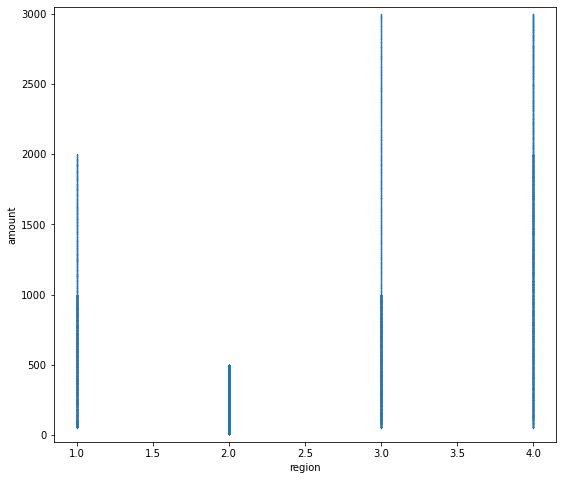

In [62]:
data.plot(kind='scatter', x='region', y='amount', ylim=(-50, 3050), s=.01, figsize=(9,8))
plt.show()

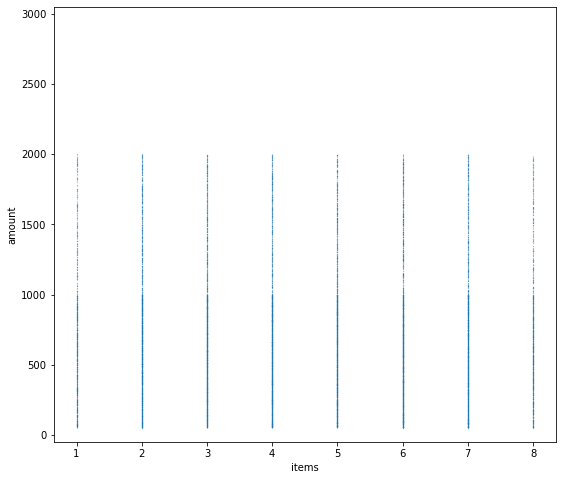

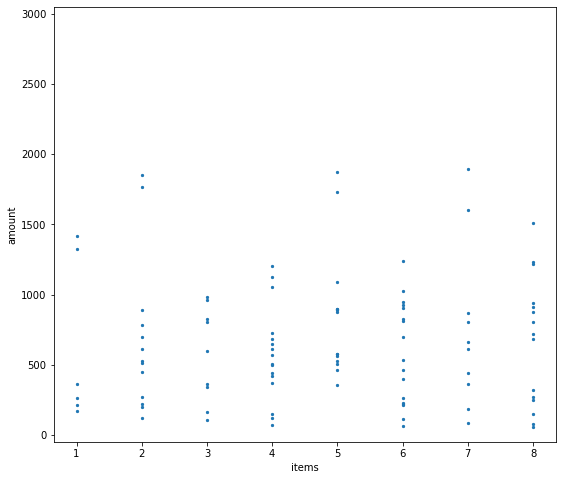

In [41]:
n_sample = north.sample(n=100)
north.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=.01, figsize=(9,8))
n_sample.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=5, figsize=(9,8))
plt.show()

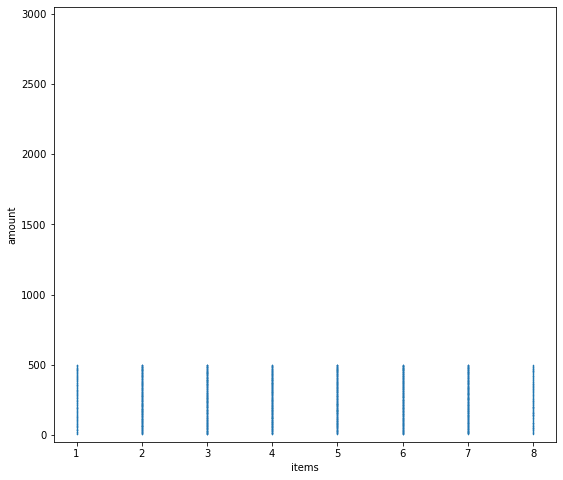

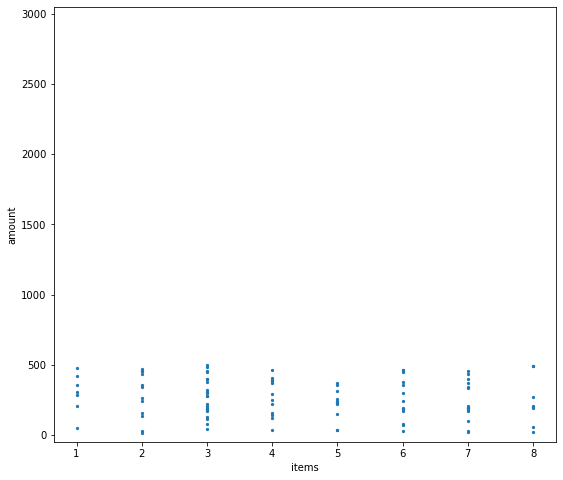

In [42]:
s_sample = south.sample(n=100)
south.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=.01, figsize=(9,8))
s_sample.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=5, figsize=(9,8))
plt.show()

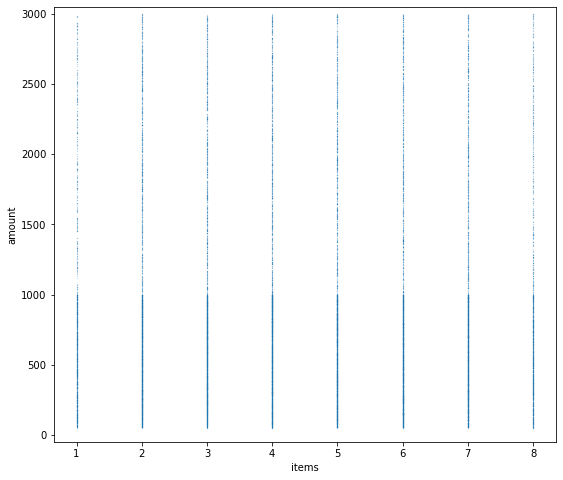

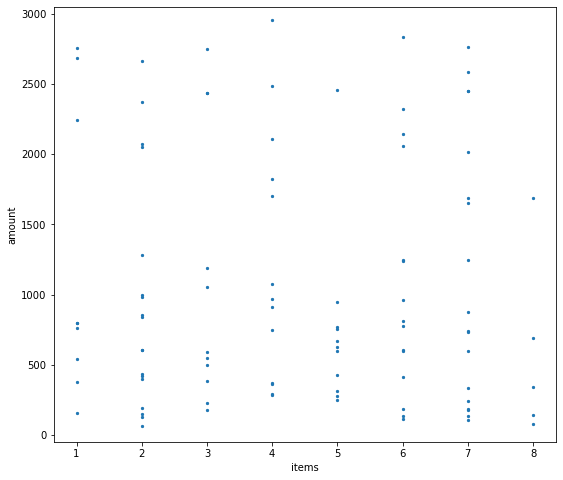

In [43]:
e_sample = east.sample(n=100)
east.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=.01, figsize=(9,8))
e_sample.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=5, figsize=(9,8))
plt.show()

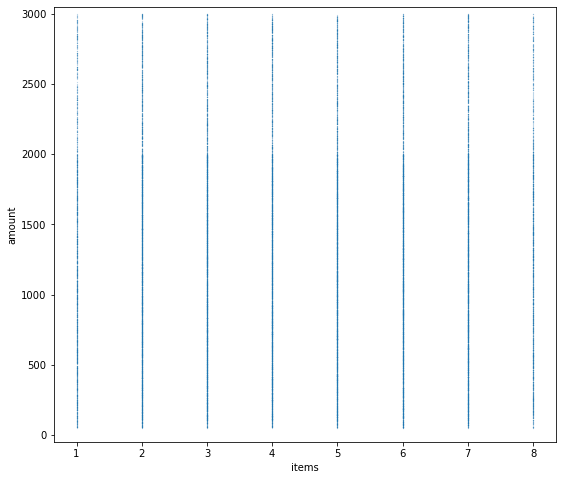

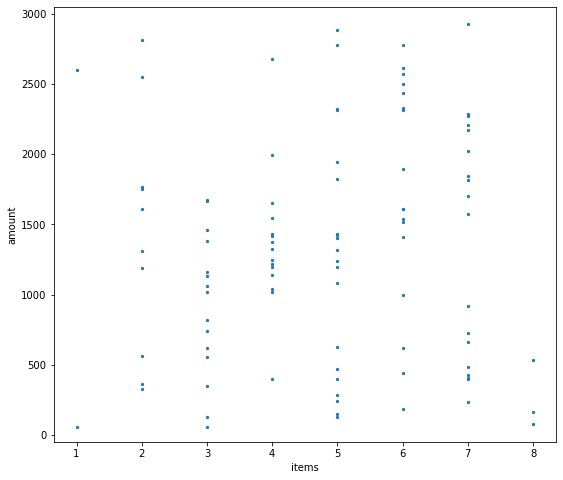

In [44]:
w_sample = west.sample(n=100)
west.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=.01, figsize=(9,8))
w_sample.plot(kind='scatter', x='items', y='amount', ylim=(-50, 3050), s=5, figsize=(9,8))
plt.show()

I thought a scatter plot might help to illustrate the distribution of `amount` spent vs. number of `items` purchased, but the
values really ran the gamut across the board. There were so many data points that the resulting graph was essentially a series of solid lines, so I tried a smaller sample size to see if I could determine a higher frequency within a more limited range with little success.

In [45]:
data['region_name'] = data['region']

In [46]:
data['region_name'].mask(data['region'] == 1, 'North', inplace=True)
data['region_name'].mask(data['region'] == 2, 'South', inplace=True)
data['region_name'].mask(data['region'] == 3, 'East', inplace=True)
data['region_name'].mask(data['region'] == 4, 'West', inplace=True)
data['region_name'].value_counts()

West     25988
South    19991
East     18000
North    15997
Name: region_name, dtype: int64

In [47]:
pt_mean = data.pivot_table(index = 'items', columns = 'region_name', values = 'amount', aggfunc = ['mean'])
print("Average Amount Spent on \"X\" Number of Items by Region")
pt_mean

Average Amount Spent on "X" Number of Items by Region


mean                       
region_name   East  North  South     West
items                                    
1           894.24 751.45 257.59 1,255.78
2           931.77 766.92 250.01 1,297.20
3           916.42 743.81 252.18 1,272.76
4           935.01 727.30 249.63 1,280.25
5           911.58 745.74 252.52 1,277.75
6           903.04 740.03 254.96 1,296.39
7           910.42 737.79 251.80 1,280.24
8           937.91 757.54 249.88 1,310.65

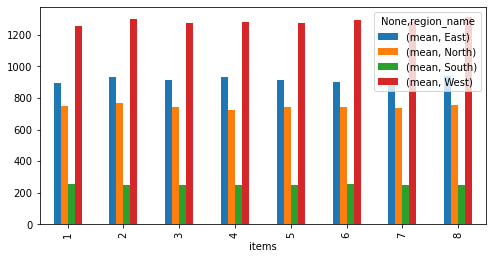

In [48]:
pt_mean.plot(kind='bar', figsize=(8, 4))
plt.show()

An attempt to answer the question "Is there a relationship between the number of `items` purchased and `amount` spent?" by `region`. This would suggest that, no, there isn't really, but I'm not certain this tells the whole story.

In [49]:
pt_median = data.pivot_table(index='items', columns='region_name', values='amount', aggfunc=['median'])
print("Median Amount Spent on \"X\" Number of Items by Region")
pt_median

Median Amount Spent on "X" Number of Items by Region


median                       
region_name   East  North  South     West
items                                    
1           683.72 662.86 261.69 1,171.60
2           703.26 689.21 244.69 1,250.00
3           691.97 655.17 254.05 1,230.40
4           728.97 642.40 246.13 1,221.25
5           706.83 680.96 249.07 1,219.30
6           669.35 653.02 253.18 1,250.95
7           700.39 658.44 253.76 1,220.10
8           705.47 669.84 241.69 1,276.20

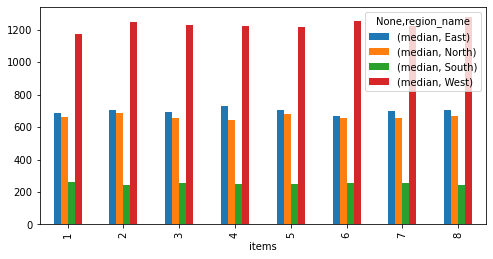

In [50]:
pt_median.plot(kind='bar', figsize=(8, 4))
plt.show()

Another attempt to look at correlation between `amount` spent and number of `items` purchased by examining median values of `amount` spent. Again, there is an indication of an oddly consistent dollar amount being spent regardless of total number of items within each `region` but that range changes depending on the `region`.

In [51]:
print('Regional Transactions by Item Count')
data.groupby(['region_name', 'items'])['items'].count()

Regional Transactions by Item Count


region_name  items
East         1        1260
             2        2576
             3        2599
             4        2675
             5        2513
             6        2515
             7        2568
             8        1294
North        1        1106
             2        2221
             3        2316
             4        2390
             5        2240
             6        2358
             7        2181
             8        1185
South        1        1442
             2        2828
             3        2801
             4        2891
             5        2800
             6        2890
             7        2905
             8        1434
West         1        1891
             2        3659
             3        3770
             4        3638
             5        3678
             6        3756
             7        3721
             8        1875
Name: items, dtype: int64

Comparison of Regional Transactions by Item Count


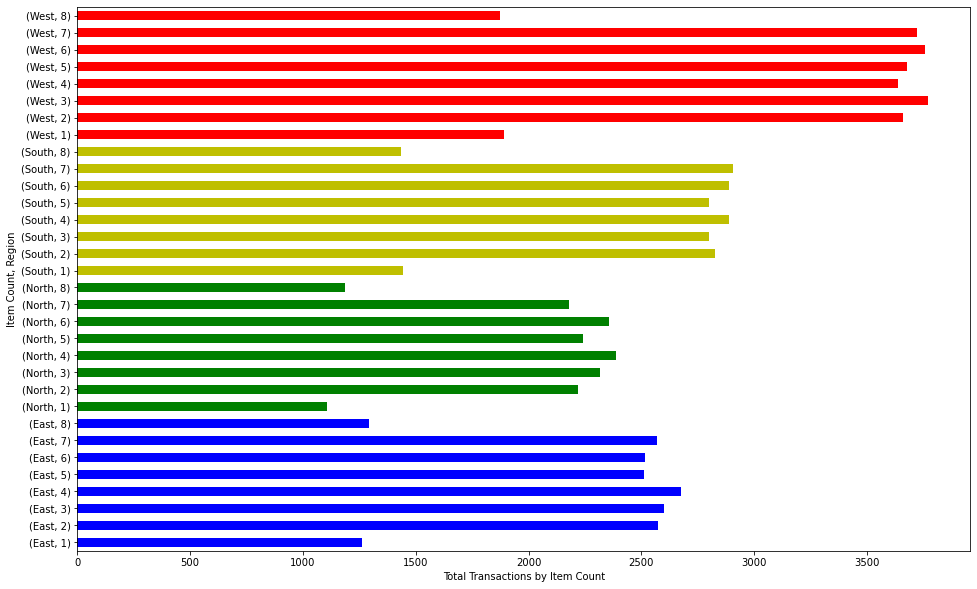

In [52]:
print('Comparison of Regional Transactions by Item Count')
rsic = data.groupby(['region_name', 'items']).size().plot(kind='barh', figsize=(16,10), 
                                                   color=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 
                                                          'g', 'g', 'g', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'r', 'r', 
                                                          'r', 'r', 'r', 'r', 'r', 'r'])
# Surely there is an easier way to set colors by range as opposed to individually. I would appreciate a nudge in the right
# direction here.
rsic.set_xlabel('Total Transactions by Item Count')
rsic.set_ylabel('Item Count, Region')
plt.show()

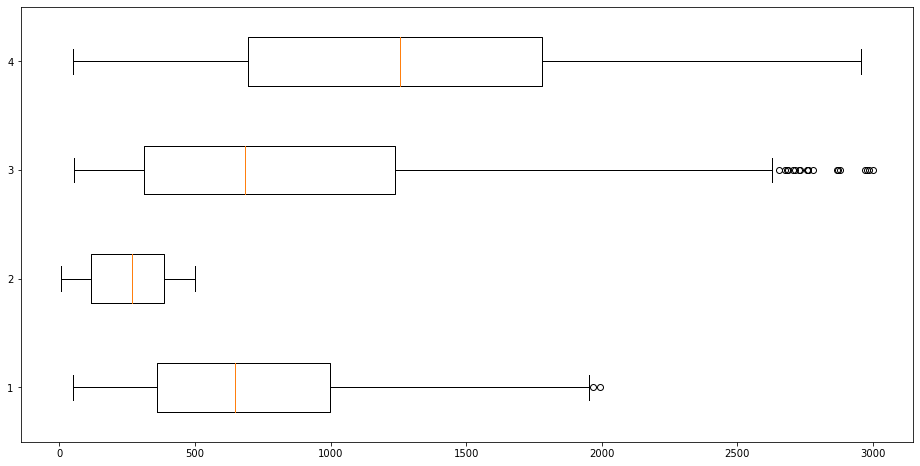

In [53]:
figure(figsize=(16,8))
n_box_am = north['amount'].sample(n=300)
s_box_am = south['amount'].sample(n=300)
e_box_am = east['amount'].sample(n=300)
w_box_am = west['amount'].sample(n=300)
plt.boxplot([n_box_am, s_box_am, e_box_am, w_box_am], 0, showfliers = True, vert = False)
plt.show()

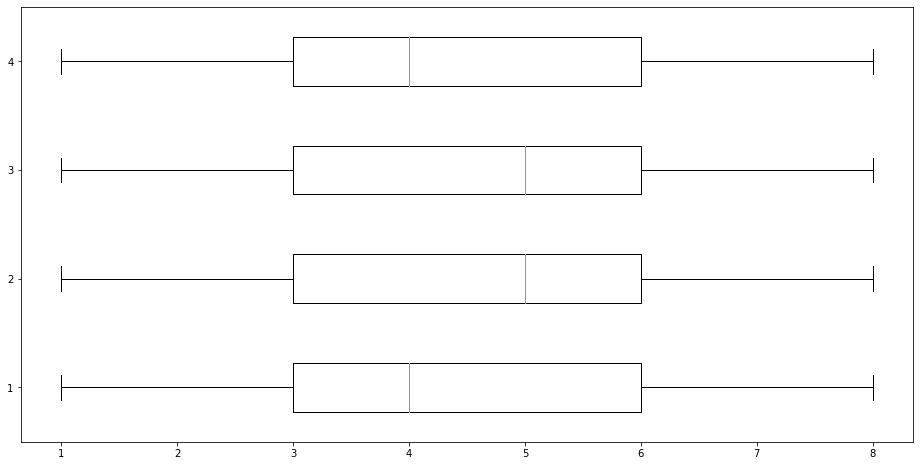

In [54]:
figure(figsize=(16,8))
n_box_i = north['items'].sample(n=300)
s_box_i = south['items'].sample(n=300)
e_box_i = east['items'].sample(n=300)
w_box_i = west['items'].sample(n=300)
plt.boxplot([n_box_i, s_box_i, e_box_i, w_box_i], 0, showfliers = True, vert = False)
plt.show()

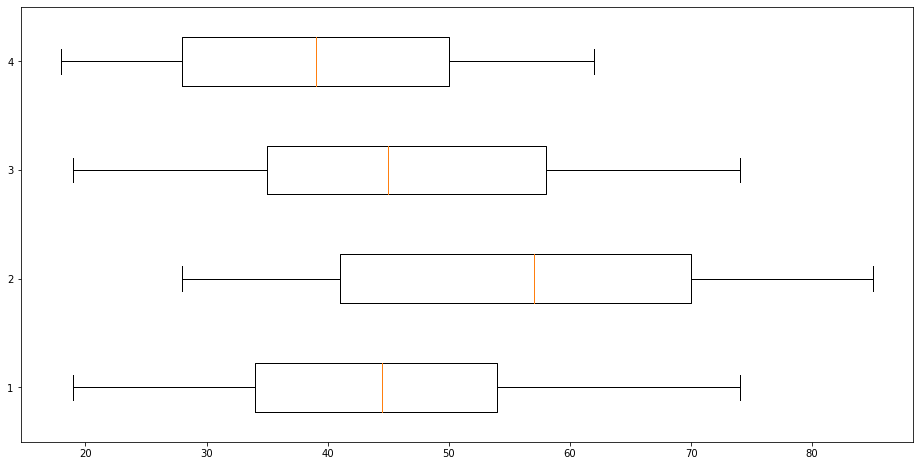

In [55]:
figure(figsize=(16,8))
n_box_ag = north['age'].sample(n=300)
s_box_ag = south['age'].sample(n=300)
e_box_ag = east['age'].sample(n=300)
w_box_ag = west['age'].sample(n=300)
plt.boxplot([n_box_ag, s_box_ag, e_box_ag, w_box_ag], 0, showfliers = True, vert = False)
plt.show()

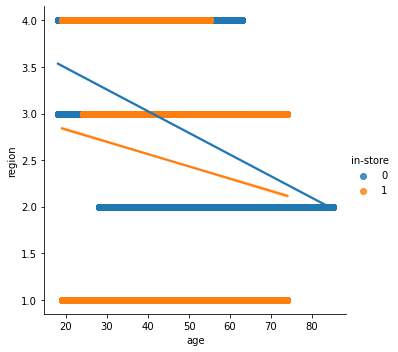

In [56]:
sns.lmplot(x='age', y='region', data=data, hue='in-store')
plt.show()

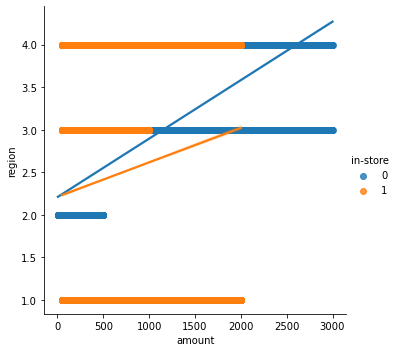

In [57]:
sns.lmplot(x='amount', y='region', data=data, hue='in-store')
plt.show()

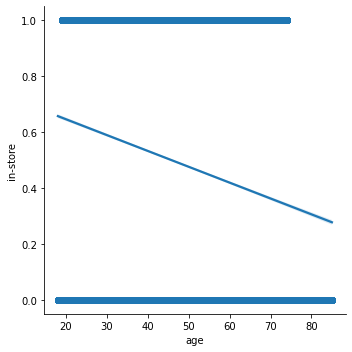

In [58]:
sns.lmplot(x='age', y='in-store', data=data)
plt.show()

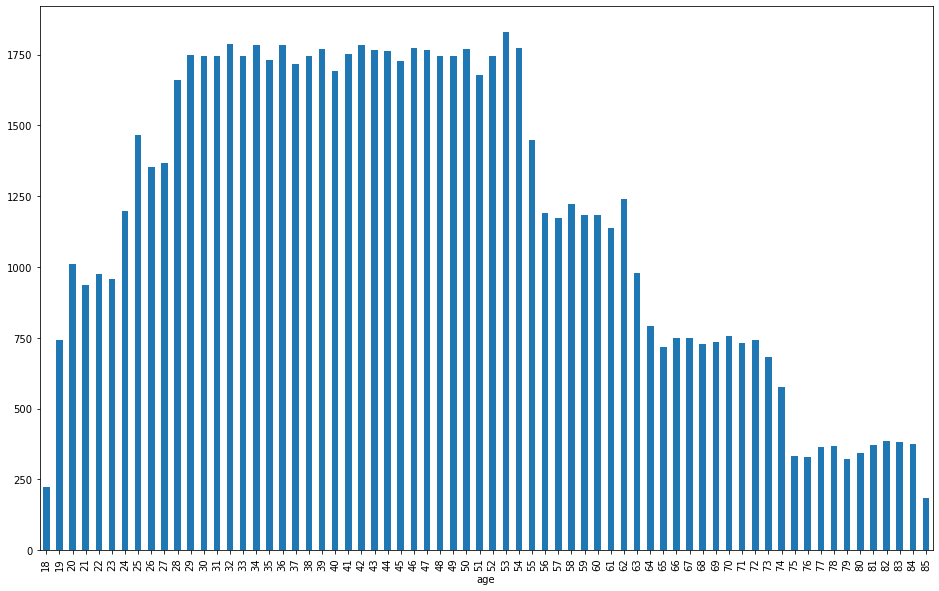

In [59]:
data.groupby(['age']).size().plot(kind='bar', figsize=(16,10))
plt.show()

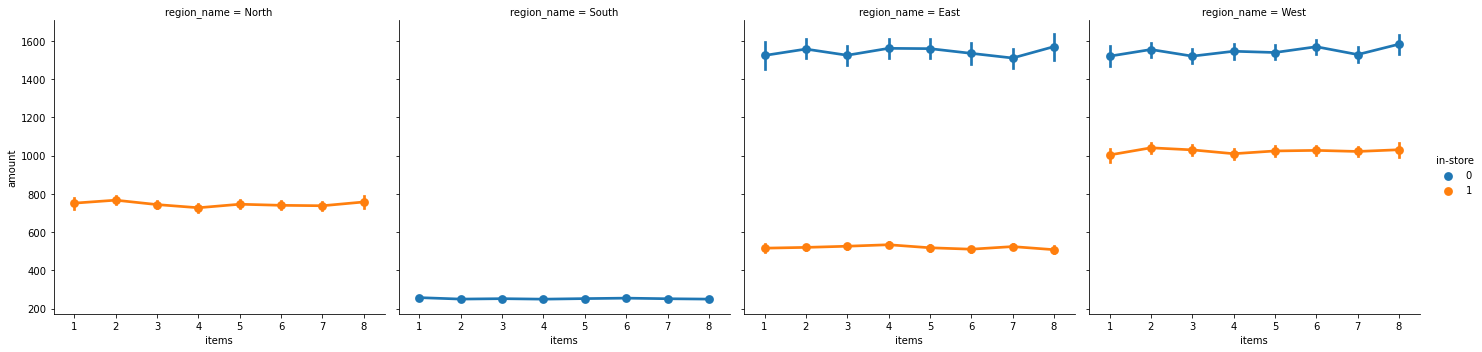

In [60]:
sns.catplot(kind='point', x='items', y='amount', data=data, hue='in-store', 
               hue_order=[0, 1], col='region_name', col_order=['North', 'South', 'East', 'West'])
plt.show()

When I plot `items` against `amount` and break it down by `region` and `in-store`, we can start to see the correlation between online sales and purchase amount. However, in the South, where all sales were online we see the lowest sales totals. I posit that there must be an unseen demographic factor at work here. Perhaps we should be taking into account income levels in the different regions.

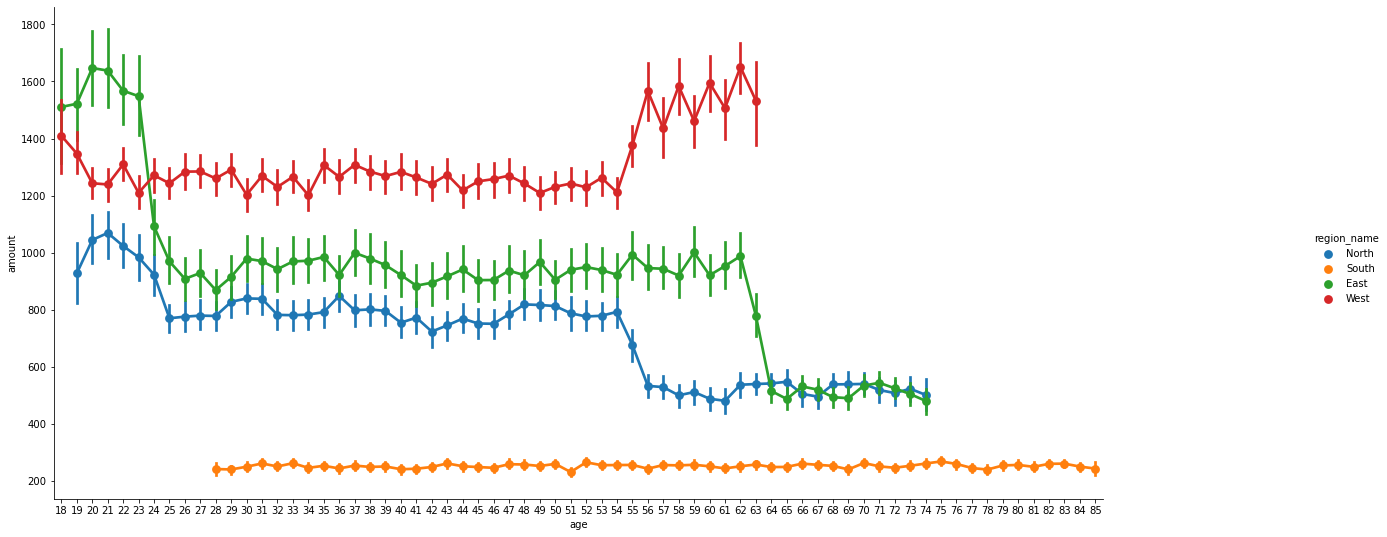

In [61]:
ag_am =sns.catplot(kind='point', x='age', y='amount', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'])
ag_am.fig.set_figwidth(22)
ag_am.fig.set_figheight(8)
plt.show()